# Project 2: Fire in the nature park

**University of Potsdam**    
**Jaesub Kim, 824937**    
**2024-08-07**

Developing a model that predicts the burnt forest area

## Data Preparation

In [22]:
import numpy as np
import pandas as pd

original_df = pd.read_csv('fires.csv',sep=',',header=0)
header = original_df.columns
print(header)
original_df.head()

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Data preprocessing

Here, the 'area' data is transformed with `'area' = log(1 + area)`, and checked if there is any missing value in data.

And the categorical variables for day of the week and month will be replaced with numbers.

Here, we dont need to normalize the data, because we are using random forest.


In [23]:
from sklearn.preprocessing import LabelEncoder

# transform the 'area' column to log(area+1)
df = original_df.copy()
original_area = df['area']
df['area'] = np.log(df['area']+1)

print(df)

num_df = df.copy()

label_encoders = {} # Dictionary initialization
for column in ['month', 'day']:
    label_encoders[column] = LabelEncoder()
    num_df[column] = label_encoders[column].fit_transform(df[column]) 
    # Convert each string to an integer. Days of the week and months are automatically converted to integers.
    




     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain      area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  0.000000
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  0.000000
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  0.000000
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  0.000000
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  0.000000
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...       ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  2.006871
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  4.012592
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  2.498152
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  0.000000
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  0.000000

[517 rows x 13 columns]


check if there are duplicated data

In [24]:
print("Checking for duplicated rows considering all columns:")
duplicates = num_df[num_df.duplicated(keep=False)]
if not duplicates.empty:
    print(duplicates)
else:
    print("No duplicated data found when considering all columns.")


num_df = num_df.drop_duplicates()
print("duplicate rows removed")

print("\n-------------------------\n")

# to check if there is any missing value in the data
print(df.isnull().sum())
# no missing data


Checking for duplicated rows considering all columns:
     X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  \
52   4  3      1    6  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   
53   4  3      1    6  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0   
99   3  4      1    3  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   
100  3  4      1    3  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0   
214  4  4      7    2  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0   
215  4  4      7    2  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0   
302  3  6      6    0  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   
303  3  6      6    0  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0   

         area  
52   0.000000  
53   0.000000  
99   0.000000  
100  0.000000  
214  3.389799  
215  3.389799  
302  0.000000  
303  0.000000  
duplicate rows removed

-------------------------

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp 

## Data Analysis

### Statistics

It is difficult to see at a glance how the data is structured with just `describe()`. Therefore, here we will look into the distribution of the data in detail through a plot. The distribution of all features of the data is shown as a histogram.


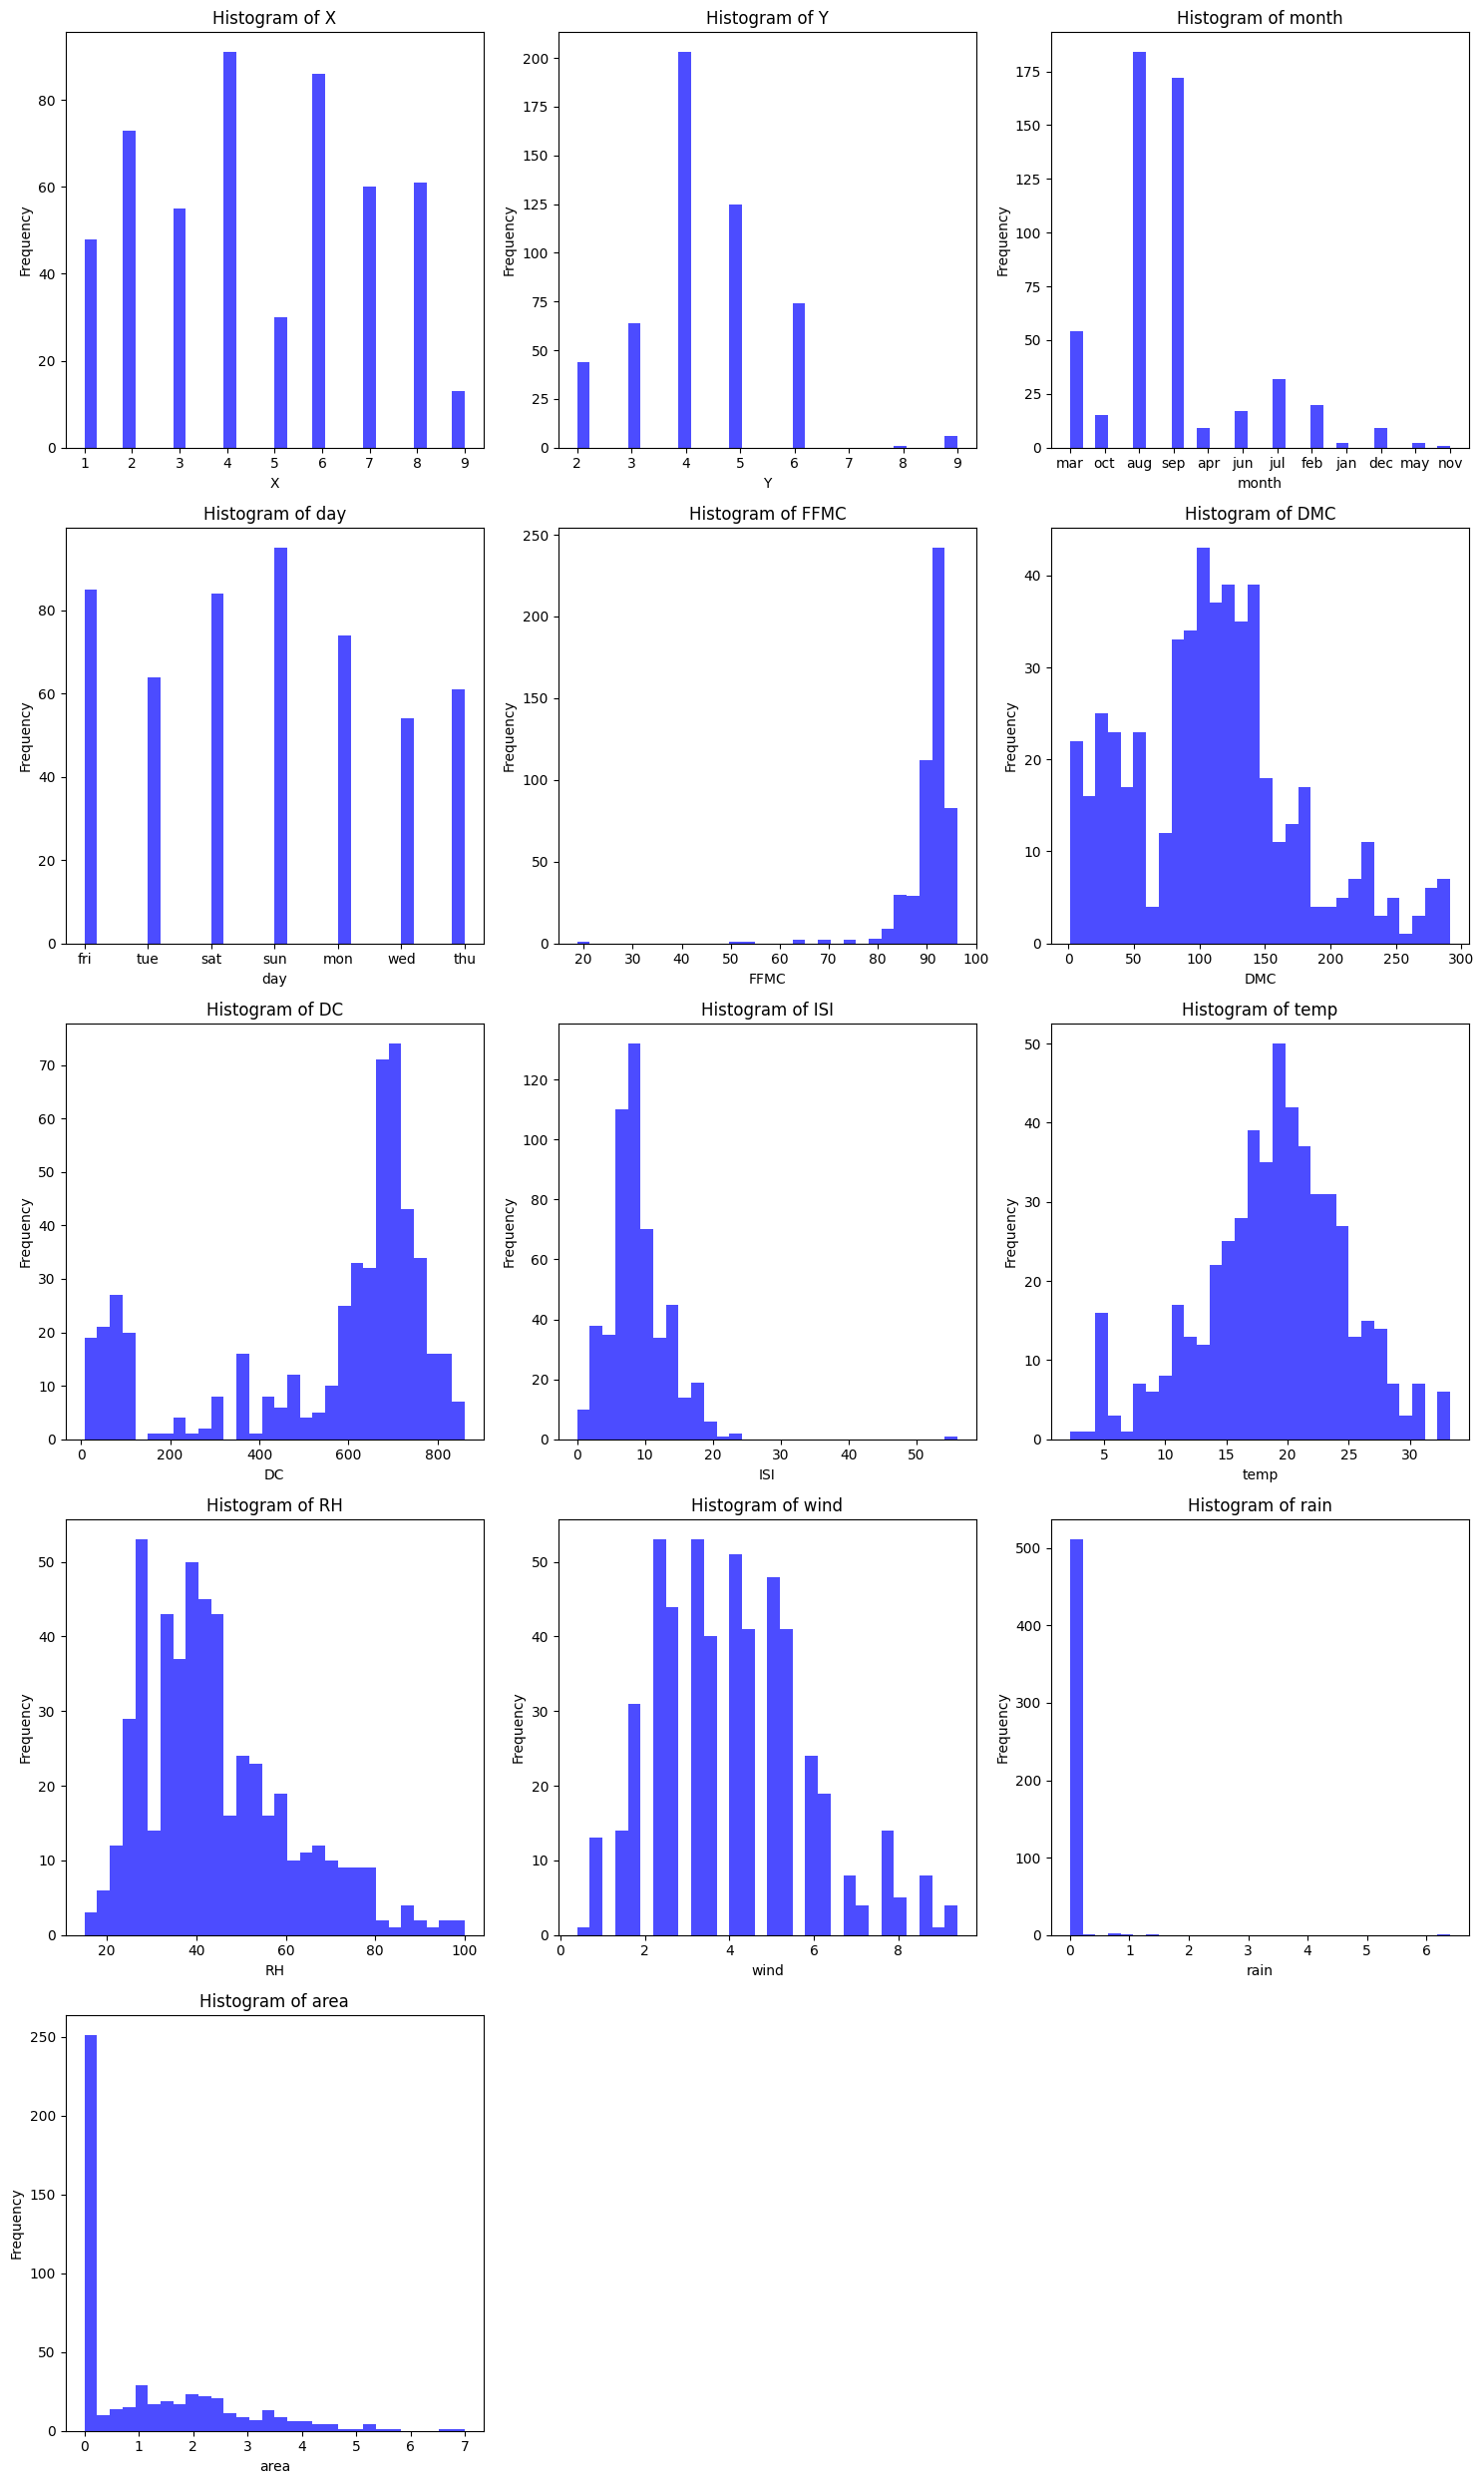

In [4]:
import matplotlib.pyplot as plt

num_features = len(header)
fig, axes = plt.subplots(nrows=(num_features + 2) // 3, ncols=3, figsize=(15, 5 * ((num_features + 2) // 3)))
axes = axes.flatten()   # Convert the axes in the form of a two-dimensional array to a one-dimensional array. 
                        # This makes it convenient to use a for loop.

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=30, color='blue', alpha=0.7) 
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjusting the subplot layout
plt.tight_layout() 
plt.show()


Before analyzing the histogram for each data, we compute measurements that can help describe the distribution. The Mean, STD, Skewness, and Kurtosis of each data are calculated. However, these measurements are not valid for all features.

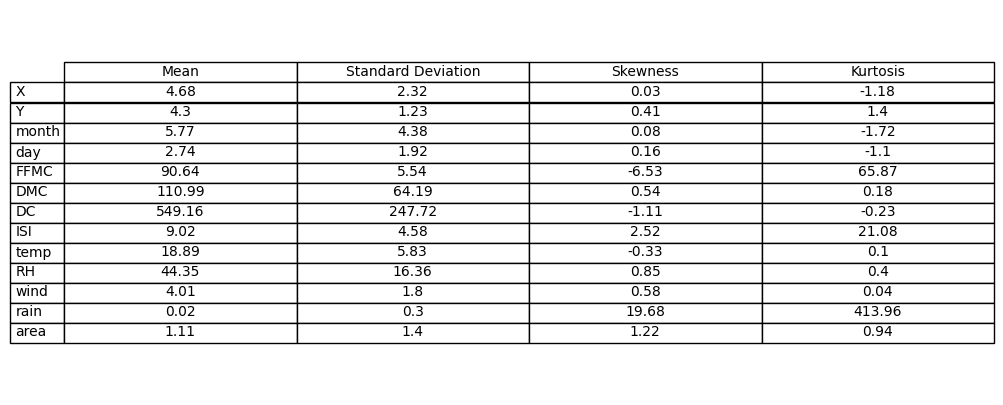

In [28]:
from scipy.stats import skew, kurtosis

def calculate_statistics(data):
    statistics = {
        'Mean': data.mean(),
        'Standard Deviation': data.std(),
        'Skewness': skew(data),
        'Kurtosis': kurtosis(data, fisher=True)
    }
    return statistics

#stats = num_df.drop(columns=['X', 'Y']) 
stats = num_df.copy()
# X and Y are coordinates that indicate location and are therefore judged to be meaningless.

# Calculate statistics for each column
statistics = {column: calculate_statistics(stats[column]) for column in stats.columns}
# Compute statistics for each column and store them in a dictionary
statistics_df = pd.DataFrame(statistics).T  
# Convert dictionary to dataframe and then transpose

# 시각적으로 보기 좋게 출력
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.axis('tight')
ax.axis('off') # 축 숨기기
table = ax.table(cellText=statistics_df.values.round(2), colLabels=statistics_df.columns, rowLabels=statistics_df.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.show()


Let's take a look at the visible features one by one, starting from the first one. The above statistics will be used in the necessary context.

- **X, Y**: These are the coordinates of the area where the forest fire occurred. It is difficult to find meaningful information from the histogram, so they are excluded here.

- **Month**: There is a clear bias, and most forest fires occur in August and September (kurtosis = -1.71). Here, we can definitely expect that the month can be used as an important factor in predicting forest fire occurrence.

- **Day**: The frequency of forest fire occurrence is evenly distributed across all days of the week, and the day of the week does not seem to have a significant effect. However, the frequency of forest fire occurrence on Friday, Saturday, and Sunday is slightly higher than on other days. This may be due to the influence of forest fire occurrence caused by hikers on the weekend.

![](./moisture.png)

- **FFMC**: The FFMC is a numerical rating of the moisture content of litter and other cured fine fuels (needles, mosses, twigs less than 1 cm in diameter). The FFMC is representative of the top litter layer 1-2 cm deep. It has a value of 0-96, and a higher value indicates drier conditions. It is known that values ​​above 86 indicate a higher probability of wildfires. This index also shows a clear skewness in the data.

- **DMC**: This index indicates the moisture content of loosely-compacted organic layers with a depth of 5-10 cm. DMC fuels have a slower drying rate than FFMC fuels and DMC may be used in predicting the probability of fire ignition by lightning. Likewise, a higher value indicates drier conditions. The current data shows values ​​between 45 and 175, indicating that wildfires mostly occur at this time.

- **DC**: The third moisture code is the DC, and it is an indicator of moisture content in deep, compact organic layers. This code represents the fuel layer approximately 10-20 cm deep. As with the two above, a larger value indicates drier conditions, and wildfires were most frequent near the 700 value.

- **ISI**: ISI stands for Initial Spread Index, and it combines FFMC and wind speed to indicate the expected fire spread rate. The data shows a small ISI value.

- **temp**: It indicates a cool and refreshing temperature of 20 degrees on average. Although the wildfires occurred in August and September, the average temperature is not very high.

- **RH**, **Rain**: It stands for Relative Humidity, and it indicates a left-skewed distribution. When related to the histogram of rain, this means that most of the fires occurred in dry humidity without rain.

- **wind**: When calculating the distance of 1 standard deviation, most wildfires occurred at wind speeds in the range of 2.23-5.81. It shows that wildfires occurred most often when the wind was not strong enough to cause ripples on the lake, which is Beaufort 5 wind speed. It shows the distribution closest to a normal distribution among the data features.

- **area**: It shows that the spread of wildfires was not large, as most values ​​are 0.

Except for temp and wind, we can see that the data is distributed haphazardly in most features. For example, FFMC and Month are skewed so that most of the data is contained in a narrow area, and DMC and DC have distributions that are difficult to explain.

* Source: https://cfs.nrcan.gc.ca/pubwarehouse/pdfs/23688.pdf


### Location and frequency of fire occurrence

Is there a relationship between location and wildfire frequency? Looking at the data distribution above, there is a certain degree of bias in the coordinates. To examine this in more detail, the wildfire frequency by coordinates is displayed as a heatmap.

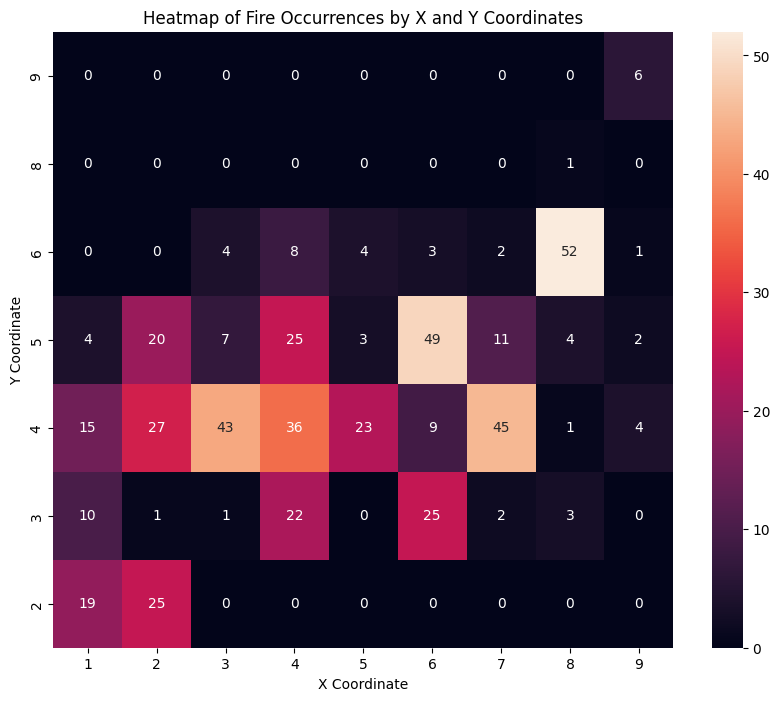

In [6]:
import seaborn as sns

# Create a heatmap using X, Y coordinates
heatmap_data = df.pivot_table(index='Y', columns='X', values='area', aggfunc='count', fill_value=0)
# The pivot_table function reorganizes a data frame to create a new table.

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cbar=True) # Create a heatmap using the pivot table we created earlier.
plt.gca().invert_yaxis()
plt.title('Heatmap of Fire Occurrences by X and Y Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

This heatmap allowed us to find the most frequent fire areas. The data clearly shows areas where forest fires occur more frequently. The most frequent fires occur in (8,6), (6,5), (7,4), and (3,4) (n>40).

However, the problem with our data is that the forest loss area due to forest fires is not that large in most forest fire data, and most of the data even show zero. This suggests that the damage due to forest fires may not match the frequency of forest fires, which may have a negative impact on training the prediction model. Therefore, in order to understand the distribution of forest fire frequency and total damage due to forest fires, we created a cumulative loss heatmap by cumulatively summing the loss area.

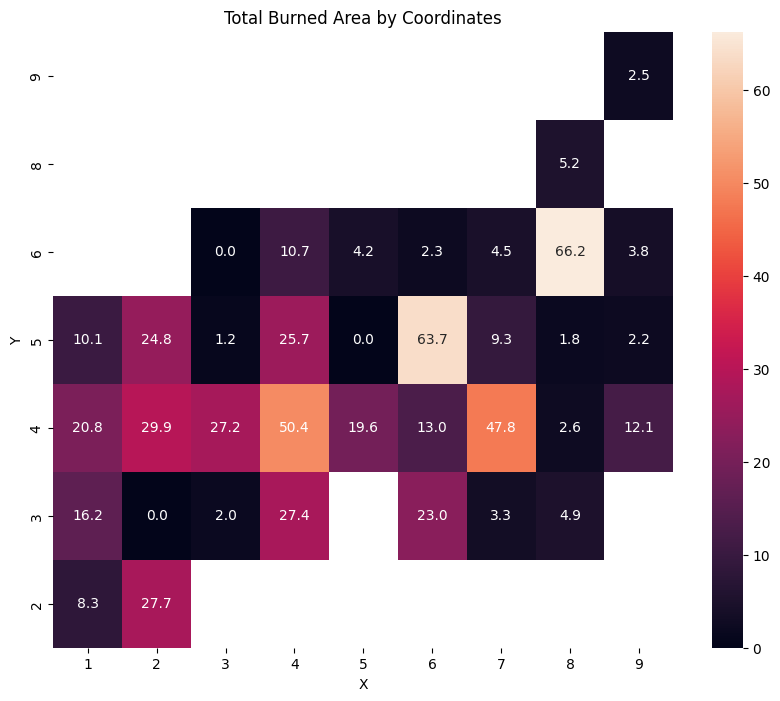

In [7]:
area_sum_by_coordinates = df.groupby(['X', 'Y'])['area'].sum().reset_index()

pivot_table = area_sum_by_coordinates.pivot(index='Y', columns='X', values='area')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f")
plt.gca().invert_yaxis() 
plt.title('Total Burned Area by Coordinates')
plt.show()

Fortunately, the cumulative damage also shows some agreement. This suggests that X and Y coordinates can be of great help in predicting forest fire occurrence and forest loss areas.

In addition, correlation analysis was performed to find out what kind of correlation area has with other variables. At this time, correlations between area and other features were calculated, as well as correlations between each feature.

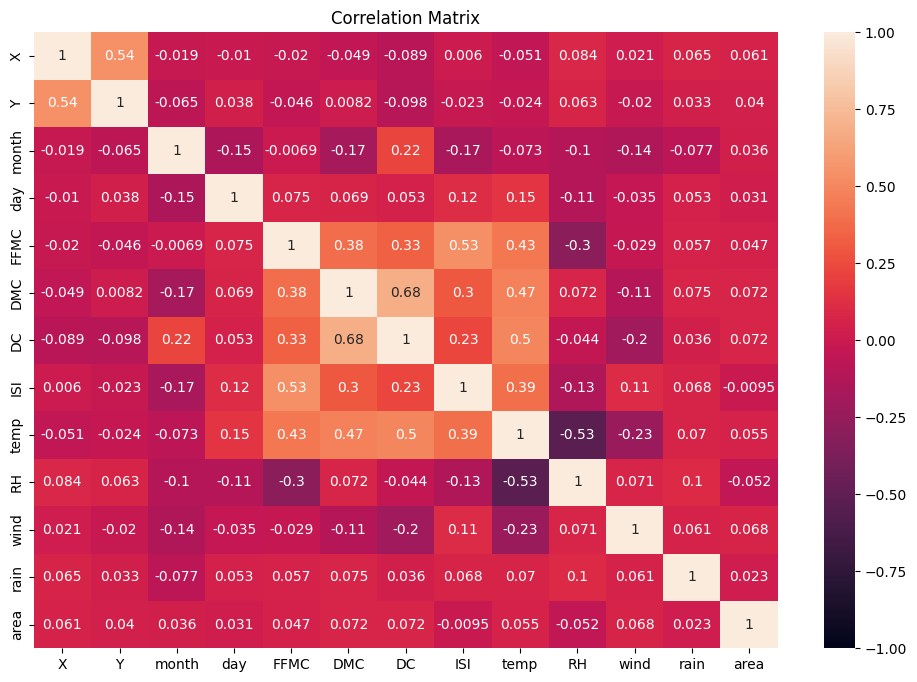

In [8]:
# Calculate correlation matrix
corr_matrix = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Surprisingly, area shows a low correlation with all features overall, but strong correlations are captured between some features. First, DMC and DC show the highest correlations, which is not surprising considering that these two are closely related to each other with a narrow height difference. However, these two show a relatively low correlation with FFMC, which is expected considering that FFMC is a surface layer that can easily dry out due to external wind or temperature. In support of this, temperature was confirmed to have a strong correlation with these three features simultaneously. Temperature also has a strong negative correlation with RH.

The very low correlation between area and other features means that they will not be of much help in predicting area. As mentioned above, there are several main reasons:

1. Insufficient absolute data volume
2. Most of the values ​​of area are close to 0

As a result, the accuracy of the model created later is expected to be low.

## Model Selection

Now, an appropriate method to train the prediction model must be chosen.

Random Forest was chosen as an appropriate learning method in this project. The reasons for the choice are as follows:

- SVM is a very effective method, but our data does not have many features, so there is no reason to use SVM.

- Our data is too small to use Neural Networks, so it cannot learn efficiently. Also, compared to SVM and Neural Network, Random Forest is easy to interpret the results.

- Decision Tree has a higher risk of overfitting than Random Forest.

- Various approaches are used in forest fire occurrence prediction models. [Stojanova et al. (2012)](https://doi.org/10.1007/s10618-011-0213-2) compared and evaluated machine learning models such as KNN, DT, LR, SVM, and BN that predict forest fires using various variables. RF showed the highest performance, and [Vecín-Arias et al. (2016)](https://doi.org/10.1016/j.agrformet.2016.05.003) and [Van Beusekom et al. (2018)](https://doi.org/10.1007/s10584-017-2045-6) also reported that the RF model showed better performance than other models in predicting forest fire occurrence.

- Random Forest does not require regularization.



## Random Forest 

First, we separated the independent and dependent variables, then divided the data into a test set and a training set, and trained the random forest.

Since our data is not that large, we will use k-fold cross validation as a method to evaluate the model, so there is no need to divide it into a training set and a test set.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = num_df.drop('area', axis=1)
y = num_df['area']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
RFmodel = RandomForestRegressor(random_state=42)
RFmodel.fit(X_train, y_train)

# prediction
RF_pred_test = RFmodel.predict(X_test)
RF_pred_train = RFmodel.predict(X_train)

# evaluation
RF_mse = mean_squared_error(y_test, RF_pred_test)
RF_mse_train = mean_squared_error(y_train, RF_pred_train)

results = {
    "Metric": ["Mean Squared Error"],
    "Train": [RF_mse_train],
    "Test": [RF_mse]
}

results_df = pd.DataFrame(results)
print(results_df)

    

               Metric     Train      Test
0  Mean Squared Error  0.337283  1.869937


There is a large difference in MSE between the training set and the test set. This can usually be due to overfitting, and the following procedure was performed to find out how parameter changes affect this.

## Parameter estimation

Overfitting can often be solved by parameter tuning. To find appropriate parameters, we measured the change in MSE according to parameter changes. The most important parameters, `n_estimators` and `max_depth`, were tested.

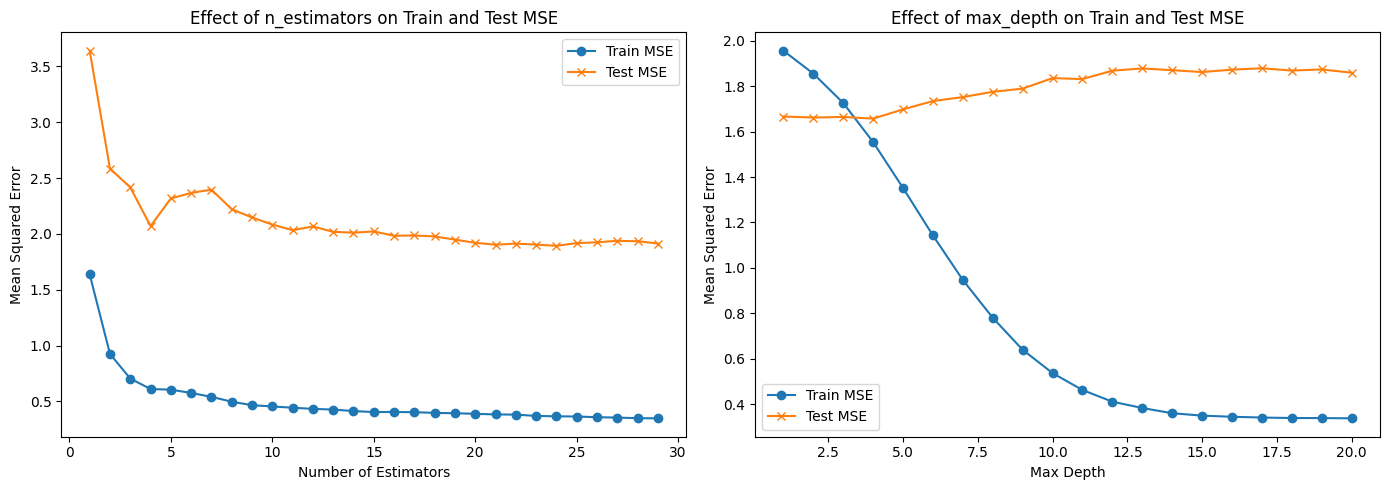

In [10]:
# Evaluate model performance by changing n_estimators. Use n_estimators values ​​between 1 and 30.
n_estimators_range = range(1, 30)
train_mse_values = []
test_mse_values = []

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_mse_values.append(train_mse)
    test_mse_values.append(test_mse)


# Evaluate model performance according to changes in max_depth. Use max_depth values ​​between 1 and 20.
max_depth_range = range(1, 21)
train_accuracies_depth = []
test_accuracies_depth = []

for max_depth in max_depth_range:
    model = RandomForestRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    
    train_accuracies_depth.append(train_mse)
    test_accuracies_depth.append(test_mse)

# Visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# First graph: MSE as a function of n_estimators
axes[0].plot(n_estimators_range, train_mse_values, label='Train MSE', marker='o')
axes[0].plot(n_estimators_range, test_mse_values, label='Test MSE', marker='x')
axes[0].set_xlabel('Number of Estimators')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('Effect of n_estimators on Train and Test MSE')
axes[0].legend()

# Second graph: MSE according to max_depth
axes[1].plot(max_depth_range, train_accuracies_depth, label='Train MSE', marker='o')
axes[1].plot(max_depth_range, test_accuracies_depth, label='Test MSE', marker='x')
axes[1].set_xlabel('Max Depth')
axes[1].set_ylabel('Mean Squared Error')
axes[1].set_title('Effect of max_depth on Train and Test MSE')
axes[1].legend()

plt.tight_layout()
plt.show()

In the case of the Number of Estimators, as `n_estimators` increases, both `Train` and `Test` gradually decrease and converge to a single line. Considering the asymptote and efficiency, `n_estimators = 15` was selected.

In the case of the maximum depth, as `max_depth` increases, `Test` slightly increases and the MSE of `Train` decreases rapidly. However, in contrast, the increase in MSE of `Test` was not that large (~ 0.1), and it was also observed that it converged to a certain value. `max_depth = 10` was selected.

## Evaluation

### K-fold Cross Validation

Random forest was performed using the obtained parameters. 5-fold cross validation was used to evaluate the model, and Mean Predictor and Medain Predictor were selected as baseline models and compared. MSE and $r^2$ score, which are traditionally used, were used as evaluation indicators for the model.

MSE directly shows the deviation from the predicted value, and $r^2$ score measures the explanatory power of the model by comparing the variance between the predicted value and the actual value. The closer it is to 1, the better the model explains the data. 0 means that the model does not explain the data, and a negative number means that the model is worse than the average.

In [11]:
from sklearn.model_selection import  cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score
from sklearn.dummy import DummyRegressor

# K-fold settings
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Model setup
RFmodel = RandomForestRegressor(n_estimators= 15, max_depth=10, random_state=42)
baseline_mean = DummyRegressor(strategy='mean')
baseline_median = DummyRegressor(strategy='median')

# Setting up MSE scorer for performance evaluation
mse_scorer = make_scorer(mean_squared_error)
r2_scorer = make_scorer(r2_score)

# Perform Random Forest cross validation
mse_scores_rf = cross_val_score(RFmodel, X, y, cv=kf, scoring=mse_scorer)
r2_scores_rf = cross_val_score(RFmodel, X, y, cv=kf, scoring=r2_scorer)

# Perform Dummy Regressor cross validation
mse_scores_dummy_mean = cross_val_score(baseline_mean, X, y, cv=kf, scoring=mse_scorer)
r2_scores_dummy_mean = cross_val_score(baseline_mean, X, y, cv=kf, scoring=r2_scorer)

mse_scores_dummy_median = cross_val_score(baseline_median, X, y, cv=kf, scoring=mse_scorer)
r2_scores_dummy_median = cross_val_score(baseline_median, X, y, cv=kf, scoring=r2_scorer)

# Output
comparision = {
    "" : ["MSE", "r2_score"],
    "Random_Forest": [np.mean(mse_scores_rf), np.mean(r2_scores_rf)],
    "Baseline_Mean": [np.mean(mse_scores_dummy_mean), np.mean(r2_scores_dummy_mean)],
    "Baseline_Median": [np.mean(mse_scores_dummy_median), np.mean(r2_scores_dummy_median)]
}

print(round(pd.DataFrame(comparision),2))



             Random_Forest  Baseline_Mean  Baseline_Median
0       MSE           2.29           1.96             2.45
1  r2_score          -0.19          -0.01            -0.25


Usually, when the accuracy or MSE of the baseline model is better than the baseline model, we evaluate that the model makes a good prediction. However, when comparing our Random Forest model with the mean and median predictions of the baseline model, the performance was better than the Median, but not significantly better, and the performance was worse than the Mean. In addition, the MSE of the three models were similar overall.

In addition, the $r^2$ score was a negative value in the Random Forest, indicating that the model was not good.

As we predicted that the performance of the initial model would be poor, our prediction model does not seem to perform well.

### Feature Importances

In order to examine how much each feature contributed to the prediction, we calculated the feature importances and expressed them as a histogram.

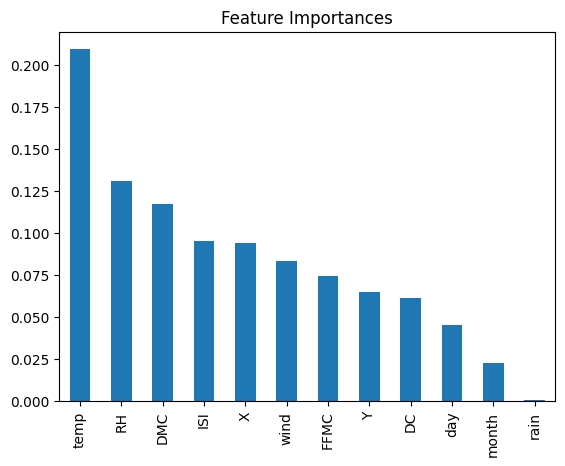

In [12]:
RFmodel.fit(X_train, y_train)

feature_importances = RFmodel.feature_importances_
RF_importances = pd.Series(feature_importances, index=X.columns)
RF_importances = RF_importances.sort_values(ascending=False)
RF_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()


The features that played the most important role in prediction were `temp`, `RH`, and `DMC`. Among them, `temp` seems to have contributed particularly much.

Temperature was initially not very high in the data and was normally distributed, so it was thought that it would not have a large effect on forest fire occurrence. However, the histogram above shows that the `temp` feature contributed the most to the prediction. This can be explained by the fact that, when referring to the heat map showing the correlation between the above features, excluding `temp`, it has a strong correlation with RH, DMC, and DC, which had the greatest influence.

`month`, which was initially thought to have the greatest influence, showed the lowest contribution after `rain` (even lower than `day`). The lower-than-expected contributions of `month`, `rain`, and `FFMC` can be explained by their distributions. In the given data, their distribution shows an extreme skew in which most of the data is concentrated in a narrow area. Data with this distribution have little information and low discrimination power, making it difficult to use them significantly in prediction.

Also, although such data may be a key feature of forest fire occurrence, since our purpose is not to predict forest fire occurrence but to predict area, it is assumed that they do not contribute significantly to the prediction here.

## Additional Analysis

There are a few more approaches that we can try in terms of data processing and prediction.

### Linear Regression

In case our model does not fit the data well, we also make predictions using linear regression using the same evaluation protocol and compare them.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# normalization for linear regression

scaler = StandardScaler() 
numeric_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
num_df[numeric_features] = scaler.fit_transform(num_df[numeric_features])

LRmodel = LinearRegression()
mse_scores_lr = cross_val_score(RFmodel, X, y, cv=kf, scoring=mse_scorer)
r2_scores_lr = cross_val_score(RFmodel, X, y, cv=kf, scoring=r2_scorer)

additional_comparision = {
    "" : ["MSE", "r2_score"],
    "Random_Forest": [np.mean(mse_scores_rf), np.mean(r2_scores_rf)],
    "Baseline_Mean": [np.mean(mse_scores_dummy_mean), np.mean(r2_scores_dummy_mean)],
    "Baseline_Median": [np.mean(mse_scores_dummy_median), np.mean(r2_scores_dummy_median)],
    "Linear_Regression": [np.mean(mse_scores_lr), np.mean(r2_scores_lr)]
}

print(round(pd.DataFrame(additional_comparision),2))

             Random_Forest  Baseline_Mean  Baseline_Median  Linear_Regression
0       MSE           2.29           1.96             2.45               2.29
1  r2_score          -0.19          -0.01            -0.25              -0.19


It shows exactly same performance.

### Multi-prediction

Using the fact that a certain location has a high frequency of wildfires, we can predict not only the `area` but also the location of the fires. Using a multioutput regressor, we can predict multiple dependent variables. Here, we directly computed the MSE of `test`, not k-fold.


In [ ]:
from sklearn.multioutput import MultiOutputRegressor


# Separate independent and dependent variables
X_multi = num_df.drop(['area', 'X', 'Y'], axis=1)
y_multi = num_df[['area', 'X', 'Y']]

# Seperate variables
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=0)

model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train_multi, y_train_multi)

y_pred_multi = model.predict(X_test_multi)

mse_area_multi = mean_squared_error(y_test_multi['area'], y_pred_multi[:, 0])
mse_X_multi = mean_squared_error(y_test_multi['X'], y_pred_multi[:, 1])
mse_Y_multi = mean_squared_error(y_test_multi['Y'], y_pred_multi[:, 2])

print('Location and Area Prediction using RF multi output regressor:')
print('MSE (area): %f' % mse_area_multi)
print('MSE (X): %f' % mse_X_multi)
print('MSE (Y): %f' % mse_Y_multi)



Location and Area Prediction using RF multi output regressor:
MSE (area): 2.678410
MSE (X): 6.124610
MSE (Y): 1.868709
